In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from datetime import datetime

In [3]:
np.random.seed(42)
n = 200  # number of customers

data = pd.DataFrame({
    'CustomerID': np.arange(1, n+1),
    'Gender': np.random.choice(['Male', 'Female'], size=n),
    'Age': np.random.randint(18, 70, size=n),
    'Annual Income (k$)': np.random.randint(15, 150, size=n),
    'Spending Score (1-100)': np.random.randint(1, 101, size=n)
})

data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,49,22,12
1,2,Female,56,41,25
2,3,Male,66,41,52
3,4,Male,69,35,85
4,5,Male,49,44,100


In [4]:
data['Gender'] = data['Gender'].map({'Male': 0, 'Female': 1})

In [5]:
features = data[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']]

In [6]:
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

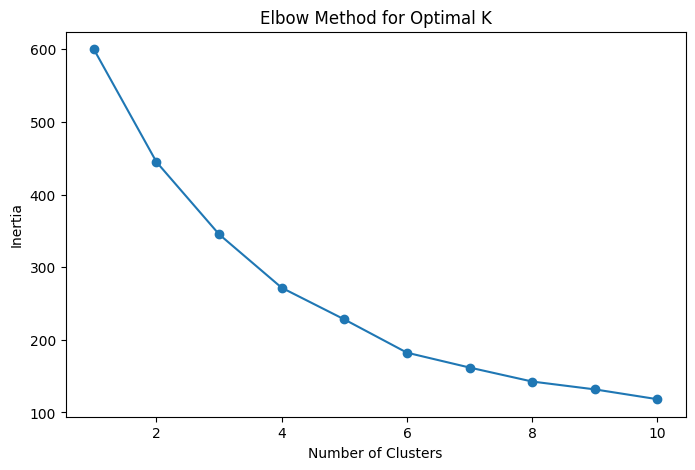

In [7]:
inertia = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(scaled_features)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8,5))
plt.plot(range(1,11), inertia, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal K')
plt.show()

In [8]:
kmeans = KMeans(n_clusters=5, random_state=42)
data['Cluster'] = kmeans.fit_predict(scaled_features)

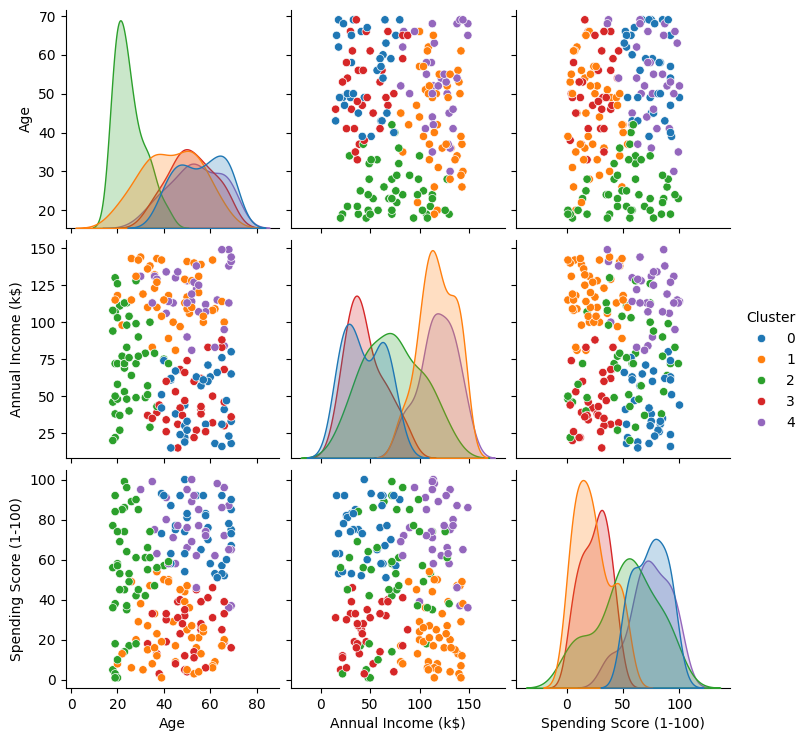

In [9]:
sns.pairplot(data[['Age', 'Annual Income (k$)', 'Spending Score (1-100)', 'Cluster']], hue='Cluster', palette='tab10')
plt.show()

In [10]:
data.groupby('Cluster')[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].mean()

,Age,Annual Income (k$),Spending Score (1-100)
Cluster,,,
0,55.750000,44.166667,74.138889
1,43.340426,117.851064,23.042553
2,25.125000,72.916667,52.895833
3,51.742857,45.285714,24.800000
4,53.529412,118.500000,73.911765


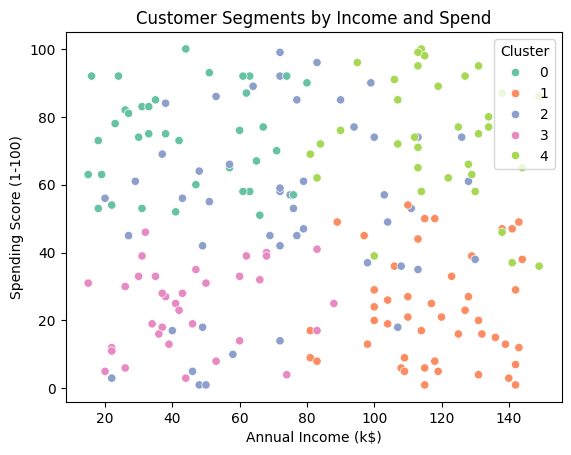

In [11]:
sns.scatterplot(data=data, x='Annual Income (k$)', y='Spending Score (1-100)', hue='Cluster', palette='Set2')
plt.title('Customer Segments by Income and Spend')
plt.show()

<Axes: >

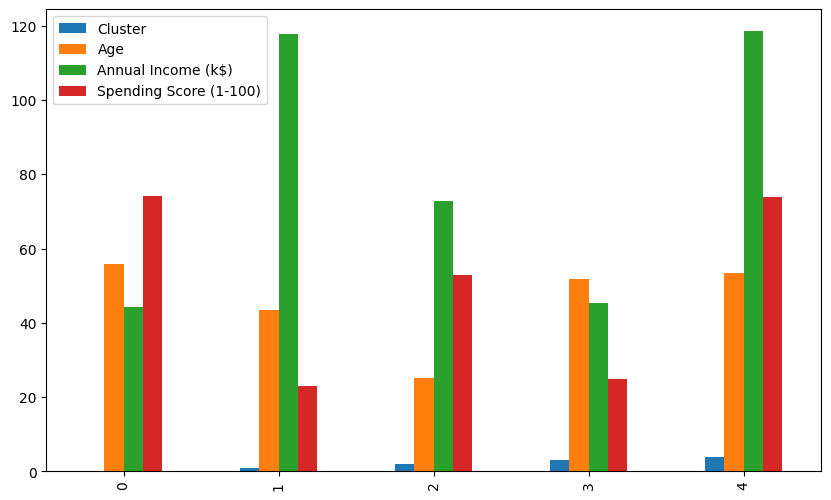

In [12]:
cluster_summary = data.groupby('Cluster')[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].mean().reset_index()
cluster_summary.plot(kind='bar', figsize=(10,6))